In [622]:
import pandas as pd
import numpy as np

# 1. Data Preprocessing 

In [623]:
df_ =  pd.read_csv('house_prices/train.csv')

In [624]:

df = pd.read_csv('house_prices/train.csv')
df_test = pd.read_csv('house_prices/test.csv')

In [625]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [626]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

None

In [627]:
df.drop("Id",axis=1,inplace=True)
df_test.drop("Id", axis =1, inplace= True)
df.drop("SalePrice",axis=1,inplace=True)

## 1-1: Null value 제거

In [628]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [629]:
null_ = df.isnull().sum()/df.shape[0]
null_.loc[null_>0].sort_values(ascending=False)

PoolQC         0.995
MiscFeature    0.963
Alley          0.938
Fence          0.808
FireplaceQu    0.473
LotFrontage    0.177
GarageYrBlt    0.055
GarageType     0.055
GarageFinish   0.055
GarageQual     0.055
GarageCond     0.055
BsmtFinType2   0.026
BsmtExposure   0.026
BsmtFinType1   0.025
BsmtCond       0.025
BsmtQual       0.025
MasVnrArea     0.005
MasVnrType     0.005
Electrical     0.001
dtype: float64

In [630]:
null2_ = df_test.isnull().sum()/df_test.shape[0]
null2_.loc[null2_>0].sort_values(ascending = False)

PoolQC         0.998
MiscFeature    0.965
Alley          0.927
Fence          0.801
FireplaceQu    0.500
LotFrontage    0.156
GarageYrBlt    0.053
GarageCond     0.053
GarageQual     0.053
GarageFinish   0.053
GarageType     0.052
BsmtCond       0.031
BsmtExposure   0.030
BsmtQual       0.030
BsmtFinType1   0.029
BsmtFinType2   0.029
MasVnrType     0.011
MasVnrArea     0.010
MSZoning       0.003
BsmtFullBath   0.001
BsmtHalfBath   0.001
Utilities      0.001
Functional     0.001
Exterior2nd    0.001
Exterior1st    0.001
SaleType       0.001
BsmtFinSF1     0.001
BsmtFinSF2     0.001
BsmtUnfSF      0.001
KitchenQual    0.001
GarageCars     0.001
GarageArea     0.001
TotalBsmtSF    0.001
dtype: float64

In [631]:
null_.loc[null_>0.4]

Alley         0.938
FireplaceQu   0.473
PoolQC        0.995
Fence         0.808
MiscFeature   0.963
dtype: float64

In [632]:
"""Null 비율이 0.5 이상인 feature 중 MiscFeature 를 제하고 나머지는 모두 의미 있는 변수라고
생각했지만 비율이 압도적으로 높은 Alley, PoolQC,는 모델에 도움이 안될 것이라고 생각하고 
삭제했습니다"""

'Null 비율이 0.5 이상인 feature 중 MiscFeature 를 제하고 나머지는 모두 의미 있는 변수라고\n생각했지만 비율이 압도적으로 높은 Alley, PoolQC,는 모델에 도움이 안될 것이라고 생각하고 \n삭제했습니다'

In [633]:
df.drop(['Alley', 'PoolQC', 'MiscFeature'], axis = 1, inplace=True)
df_test.drop(['Alley', 'PoolQC', 'MiscFeature'], axis = 1, inplace=True)

In [634]:
#나머지는 모두 0 으로 대체 
df[['Fence','FireplaceQu']]= df[['Fence','FireplaceQu']].fillna('1')
df_test[['Fence','FireplaceQu']]= df[['Fence','FireplaceQu']].fillna('1')

In [635]:
#Lot Frontage 를 neightborhood 의 median 으로 대체 
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [636]:
#주차장에 대한 범주형 변수 None 으로 대체
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')

In [637]:
#주차장에 대한 연속형 변수 0 으로 대체 
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

In [638]:
#지하실에 대한 연속형 변수 0으로 대체 
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

In [639]:
#지하실에 대한 범주형 변수 None 으로 대체
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')

In [640]:
# Masonry (석조 건축물) 에 대한 범주형, 연속형 변수 위와 동일하게 처리 
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(0)
df_test['MSSubClass'] = df_test['MSSubClass'].fillna("None")

In [641]:
#가장 흔한 값으로 대체
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

In [642]:
null_ = df.isnull().sum()/df.shape[0]
null_.loc[null_>0].sort_values(ascending=False)

Series([], dtype: float64)

In [643]:
null2_ = df_test.isnull().sum()/df_test.shape[0]
null2_.loc[null2_>0].sort_values(ascending = False)

Utilities   0.001
dtype: float64

In [644]:
del df_test['Utilities']
del df['Utilities']

## 1-2: 범주형 변수 처리

In [645]:
#연속형 변수로 표기되어있지만 범주형 변수의 성격 변수 처리
fake_numerical_col= ['MSSubClass','OverallCond','YrSold','MoSold']
for col in fake_numerical_col:
    df[col] = df[col].astype(str)
    df_test[col] = df_test[col].astype(str)
    

In [646]:
categorical_col = list(df.select_dtypes(include='object').columns)
categorical_col

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [647]:
from sklearn.preprocessing import LabelEncoder

[i for i in categorical_col if len(set(df[i])) >= 10]

['MSSubClass', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'MoSold']

In [648]:
for col in [i for i in categorical_col if len(set(df[i])) >= 10]:
    print(col+ ':  ',len(set(df[str(col)])))

MSSubClass:   15
Neighborhood:   25
Exterior1st:   15
Exterior2nd:   16
MoSold:   12


In [649]:
for col in categorical_col:
    lbl = LabelEncoder()
    lbl.fit(list(df[col].values))
    df[col] = lbl.transform(list(df[col].values))
    lbl.fit(list(df_test[col].values))
    df_test[col] = lbl.transform(list(df_test[col].values))

## 1-3: Skewness 처리

In [652]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.452
PoolArea,14.813
Condition2,13.158
LotArea,12.195
3SsnPorch,10.294
Heating,9.845
LowQualFinSF,9.002
RoofMatl,8.101
LandSlope,4.809
KitchenAbvGr,4.484


In [654]:
from scipy.special import boxcox1p
skewed_col = skewness[abs(skewness) > 1]
lam = 0.15
for feat in [i for i in skewed_col.index if i != 'SalePrice']:
    df[feat] = boxcox1p(df[feat], lam)
    df_test[feat] = boxcox1p(df_test[feat], lam)

In [656]:
len(df.columns)

75

In [657]:
len(df_test.columns)

75

In [658]:
set(df.columns)- set(df_test.columns)

set()

In [659]:
df = pd.get_dummies(df)
df_test=pd.get_dummies(df_test)

In [655]:
df_test.shape

(1459, 75)

## 1-4: K-means 변수 추가 

In [676]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [677]:
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

In [678]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

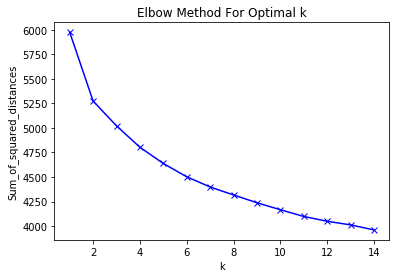

In [679]:
#Using the elbow method 
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# Choose k=3

In [683]:
kmeans = KMeans(3)
kmeans.fit(data_transformed)
df['kmeans'] = kmeans.labels_


In [684]:
test_transformed = kmeans.fit_transform(df_test)
df_test['kmeans'] = kmeans.labels_

# EDA

In [501]:
import warnings
warnings.filterwarnings('ignore')

In [502]:
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()

In [503]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

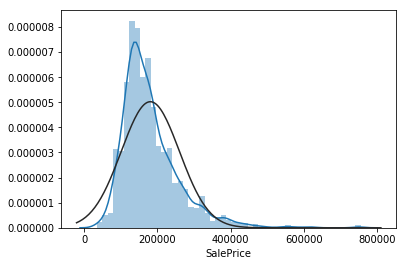

In [504]:
sns.distplot(df_['SalePrice'],fit=norm)

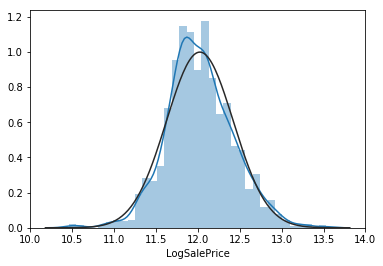

In [505]:
#Log transformation
df_["LogSalePrice"] = np.log1p(df_["SalePrice"])

#Check the new distribution 
sns.distplot(df_['LogSalePrice'] , fit=norm);

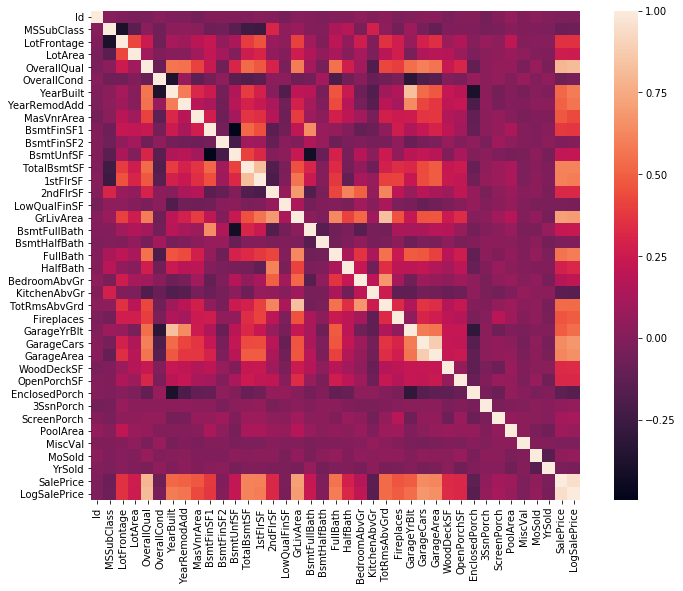

In [506]:
corrmat = df_.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=1,square=True)

# SVM Regressor

In [685]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [686]:
X = df
y = df_['SalePrice']

In [687]:
#Using Support Vector Regression
svm_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('SVR', SVR(kernel='rbf',C=1,epsilon=0.1))
])

svm_regressor.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVR', SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [688]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
#Reference: 박규리님 참고자료
def fivefold(X,y,model):
    model_scores = np.zeros(5)
    scores = np.zeros(5)
    if type(X) is np.ndarray:
        X = pd.DataFrame(X)


    cv = KFold(5, shuffle=False, random_state=0)
    for i, (idx_train, idx_test) in enumerate(cv.split(X)):
        #데이터 하나씩 트레인과 테스트에 부과
        X_train = X.iloc[idx_train]
        X_test = X.iloc[idx_test]
        y_train, y_test = y[idx_train], y[idx_test]

        #모델 fit
        result = model.fit(X_train,y_train)

        #prediction
        model_pred = result.predict(X_train)
        pred = result.predict(X_test)
        rmse_train = mean_squared_error(y_train, model_pred)
        rmse_test = mean_squared_error(y_test, pred)

        #test 5번 하나하나 프린트
        model_scores[i] = rmse_train
        scores[i] = rmse_test
        print("학습 accuacy = {:.2f}, 검증 accuacy = {:.2f}".format(rmse_train, rmse_test))
    print('평균 train accuacy : %.2f'  %(model_scores.mean()))
    print('평균 test accuacy : %.2f'  %(scores.mean()))

In [689]:
fivefold(X,y,svm_regressor)

학습 accuacy = 6846426165.61, 검증 accuacy = 5918362447.92
학습 accuacy = 6539220751.83, 검증 accuacy = 6966110900.69
학습 accuacy = 6239806929.77, 검증 accuacy = 8000903017.02
학습 accuacy = 6949417215.91, 검증 accuacy = 5143413074.54
학습 accuacy = 6511656356.55, 검증 accuacy = 7072078906.84
평균 train accuacy : 6617305483.93
평균 test accuacy : 6620173669.40


# Linear Regression

In [690]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression().fit(X,y)

fivefold(X,y,linear_regressor)


학습 accuacy = 1079658710.15, 검증 accuacy = 730759278.90
학습 accuacy = 975841412.85, 검증 accuacy = 1139561198.28
학습 accuacy = 934931802.23, 검증 accuacy = 1351239761.89
학습 accuacy = 1045341909.14, 검증 accuacy = 855332338.61
학습 accuacy = 836150805.18, 검증 accuacy = 1787159052.41
평균 train accuacy : 974384927.91
평균 test accuacy : 1172810326.02


# Boosting Regression 

In [691]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

In [692]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [693]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [694]:
GBoost.fit(X,y)
fivefold(X,y,GBoost)

학습 accuacy = 188257330.09, 검증 accuacy = 462709796.95
학습 accuacy = 148166350.69, 검증 accuacy = 1057785565.81
학습 accuacy = 136326034.15, 검증 accuacy = 896405794.88
학습 accuacy = 196802668.48, 검증 accuacy = 410058361.38
학습 accuacy = 152638632.55, 검증 accuacy = 1049882122.86
평균 train accuacy : 164438203.19
평균 test accuacy : 775368328.38


In [695]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [696]:
model_xgb.fit(X,y)
fivefold(X,y,model_xgb)

학습 accuacy = 8037918.24, 검증 accuacy = 468522253.39
학습 accuacy = 7394455.05, 검증 accuacy = 913586401.74
학습 accuacy = 7065495.06, 검증 accuacy = 764006321.36
학습 accuacy = 7613052.48, 검증 accuacy = 490064510.65
학습 accuacy = 7725605.12, 검증 accuacy = 828515852.82
평균 train accuacy : 7567305.19
평균 test accuacy : 692939067.99


In [697]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [698]:
model_lgb.fit(X,y)
fivefold(X,y,model_lgb)

학습 accuacy = 172117574.96, 검증 accuacy = 552935161.45
학습 accuacy = 159316239.71, 검증 accuacy = 951617875.73
학습 accuacy = 149181120.24, 검증 accuacy = 962245116.86
학습 accuacy = 175496791.89, 검증 accuacy = 476706688.26
학습 accuacy = 165963132.47, 검증 accuacy = 969145617.08
평균 train accuacy : 164414971.85
평균 test accuacy : 782530091.88


In [699]:
random_forest = RandomForestRegressor(n_estimators=500, max_depth=3, n_jobs=-1)

In [700]:
random_forest.fit(X,y)
fivefold(X,y, random_forest)

학습 accuacy = 1267387955.14, 검증 accuacy = 1278533966.59
학습 accuacy = 1163627230.81, 검증 accuacy = 1643222857.10
학습 accuacy = 1169253373.60, 검증 accuacy = 1795087583.29
학습 accuacy = 1256589473.98, 검증 accuacy = 1251086914.89
학습 accuacy = 1116174527.31, 검증 accuacy = 1793465373.48
평균 train accuacy : 1194606512.17
평균 test accuacy : 1552279339.07


# Other Model (Lasso, ENet, Kernel Ridge)

In [726]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso

In [727]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [728]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [729]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# Stacking

In [754]:
#estimators = [GBoost,model_xgb,model_lgb,random_forest,lasso,ENet,KRR]
#estimators = [lasso,ENet,KRR]
estimators = [GBoost,model_xgb,model_lgb,random_forest]

In [755]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [756]:
for est in estimators:
    est.fit(X_train,y_train)
    
meta_train_set = np.array([est.predict(X_test) for est in estimators]).T

In [757]:
from sklearn.model_selection import cross_val_score

In [760]:
second_models = [GBoost,model_xgb,model_lgb,random_forest,lasso,ENet,KRR,svm_regressor]

In [761]:
for est in second_models:
    result = cross_val_score(est, meta_train_set, y_test, scoring='neg_mean_squared_error', cv=5).mean()
    print((-1 * result) ** (1/2))

31677.29103851149
29795.35380482429
30906.448471148553
27366.79986179569
23874.049743740987
23871.120608676578
24176.096394051096
82090.81749379983


In [456]:
# 가장 좋은 성능을 가진 estimator 는 Lasso
# RMSE: 23871

# Writing Submission file 

In [762]:
meta_test_set.shape

(1459, 4)

In [763]:
df_test.shape

(1459, 76)

In [764]:
meta_test_set = np.array([est.predict(df_test) for est in estimators]).T

In [765]:
temp = pd.read_csv('house_prices/test.csv')

In [766]:
y_test = np.zeros((1459,1))

In [771]:
lasso.fit(meta_test_set,np.arange(1459))
#random_forest.predict(meta_test_set)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [772]:
submission = pd.DataFrame()
submission['ID'] = temp['Id']
submission['SalePrice'] = lasso.predict(meta_test_set)

In [773]:
submission.to_csv('submission.csv',index=False)